# Equity and Bitcoin Analysis With Python Webinar Notebook

## Module Imports

In [81]:
import yfinance

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import re



In [ ]:
# Andrei and Vanesh TODOs:

# TODO: Create 1 lineplot with 3-5 equities.
# TODO: Create 1 lineplot with 3-5 equities with 30-day price change.
# TODO: Compare to DJI / S&P 500.

## Define Functions

In [92]:
def create_interactive_plot(symbol_list, period):
    """Create an interactive plot of stock prices using data from Yahoo! finance and the
    Plotly visualization library.
    
    Parameters
    ----------
    symbol_list : list
        Iterable of ticker symbols.
        
    period : str
        Duration to look back. Provide a string in the format "1mo", "2mo", "1y", "2y",
        or "max."
    
    
    Returns
    -------
    None
    
    """
    if "mo" in period:
        units = "Months"
    elif "y" in period:
        units = "Years"
    
    period_name = re.findall("[0-9]+", period)[0]
        
    all_data = pd.DataFrame()
    for symbol in equity_list:
        ticker = yfinance.Ticker(symbol)
        data = ticker.history(period=period)
        data = data.reset_index()[["Date", "Close"]]
        data["symbol"] = symbol
        all_data = pd.concat([all_data, data], axis=0)

    fig = px.line(data_frame=all_data, x="Date", y="Close", color="symbol",
                 title=f"Equity Prices for Previous {period_name} {units}")
    fig.show()


def create_pct_change_plot(symbol_list, period, pct_change_window):
    """Create an interactive plot of stock prices percent change Yahoo! finance and the
    Plotly visualization library.
    
    Parameters
    ----------
    symbol_list : list
        Iterable of ticker symbols.
        
    period : str
        Duration to look back. Provide a string in the format "1mo", "2mo", "1y", "2y",
        or "max."
    
    pct_change_window : int
        Window over which to calculate the percent change. Provide an integer, such as 30, 60, 90.
    
    
    Returns
    -------
    None
    
    """
    if "mo" in period:
        units = "Months"
    elif "y" in period:
        units = "Years"
    
    period_name = re.findall("[0-9]+", period)[0]
    
    all_data = pd.DataFrame()
    for symbol in equity_list:
        ticker = yfinance.Ticker(symbol)
        data = ticker.history(period=period)
        data = data.reset_index()[["Date", "Close"]]
        data["Close"] = data["Close"].pct_change(pct_change_window)
        data["symbol"] = symbol
        all_data = pd.concat([all_data, data], axis=0)
    
    fig = px.line(data_frame=all_data, x="Date", y="Close", color="symbol",
                 title=f"Percent Change Over a {pct_change_window}-Day Period for Previous {period_name} {units}")
    fig.show()

In [96]:
equity_list = ["CCL", "TSLA", "KO", "AMZN", "BTC-USD"]
create_pct_change_plot(equity_list, "18mo", 10)
# create_interactive_plot(equity_list, "6mo")

In [21]:
# TODO: Create 1 lineplot with 3-5 equities.
# TODO: Create 1 lineplot with 3-5 equities with 30-day price change.
# TODO: Compare to DJI / S&P 500.




NameError: name 'ticker' is not defined

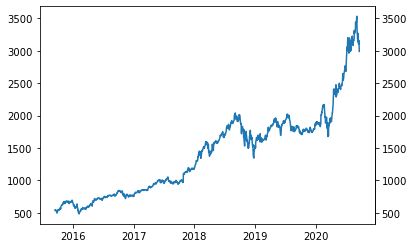

In [28]:
symbol = "AMZN"
ticker = yfinance.Ticker(symbol)
data = ticker.history(period="5y")
data = data.reset_index()
if symbol == "AMZN":
    ax = plt.gca()
    sec_axis = ax.secondary_yaxis("right")
plt.plot(data["Date"], data["Close"])